# Predicting myopia in a population
The dataset is a subset of data from the Orinda Longitudinal Study of `Myopia` (OLSM), a cohort study of ocular component development and risk factors for the onset of myopia in children. Data collection began in the 1989–1990 school year and continued annually through the 2000–2001 school year. All data about the parts that make up the eye (the ocular components) were collected during an examination during the school day. Data on family history and visual activities were collected yearly in a survey completed by a parent or guardian. The dataset used in this text is from 618 of the subjects who had at least five years of follow-up and were not myopic when they entered the study. All data are from their initial exam and the dataset includes 17 variables. In addition to the ocular data there is information on age at entry, year of entry, family history of myopia and hours of various visual activities. The ocular data come from a subject’s right eye.

In [1]:
#import libraries
import pandas as pd
import requests

In [2]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


## Importing data

The dataset `myopia.csv` is collected from https://rdrr.io/github/emilelatour/purposeful/man/myopia.html:  
A data frame with 618 observations and 18 variables:

* id: Study ID
* studyyear: Year subject entered the study
* myopic: Myopia within the first five years of follow up (No/Yes)
* age: Age at first visit (years)
* gender: Gender (Male/Female)
* spheq: Spherical Equivalent Refraction (diopter)
* al: Axial Length (mm)
* acd: Anterior Chamber Depth (mm)
* lt: Lens Thickness (mm)
* vcd: Vitreous Chamber Depth (mm)
* sporthr: Time spent engaging in sports/outdoor activities (hours per week)
* readhr:Time spent reading for pleasure (hours per week)
* comphr:Time spent playing video/computer games or working on the computer (hours per week)
* studyhr:Time spent reading or studying for school assignments (hours per week)
* tvhr: Time spent watching television (hours per week)
* diopterhr: Composite of near-work activities (hours per week)
* mommy: Was the subject’s mother myopic? (No/Yes)
* dadmy: Was the subject’s father myopic? (No/Yes)

With this data you can create a model that can predict the occurrence of myopia in the study set. The first step for them is to import the data.

In [10]:
url_csv = 'https://learn.canvas.net/courses/1179/files/461762/download?download_frd=1'
myopia = pd.read_csv(url_csv)   
myopia.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [11]:
myopia.describe()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,309.500000,1992.359223,0.131068,6.299353,0.488673,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382
std,178.545512,1.734507,0.337748,0.712950,0.500277,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402
min,1.000000,1990.000000,0.000000,5.000000,0.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,155.250000,1991.000000,0.000000,6.000000,0.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000
50%,309.500000,1992.000000,0.000000,6.000000,0.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000
75%,463.750000,1994.000000,0.000000,6.000000,1.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000
max,618.000000,1995.000000,1.000000,9.000000,1.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000


To check the shape of the data you can use a histogram charts each of the variables.

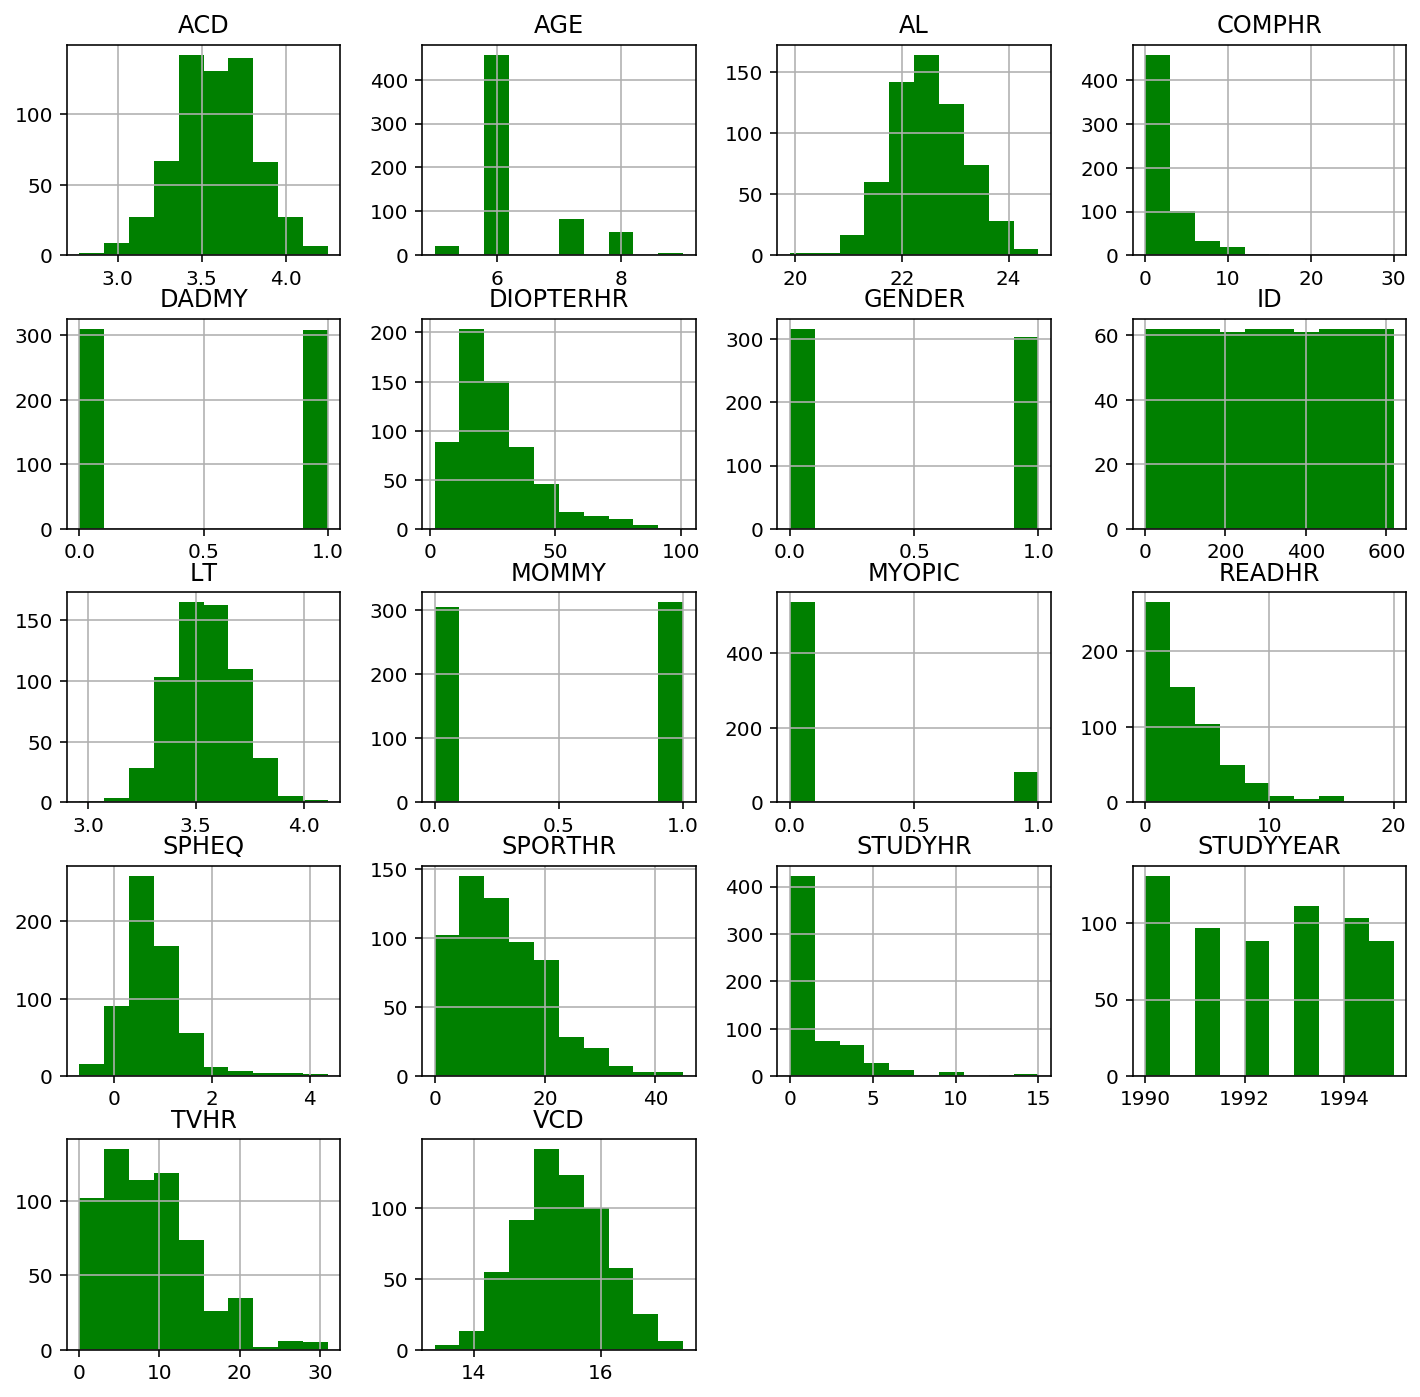

In [12]:
myopia.hist(figsize = (12, 12), color='g');

There are multiple binary characteristics (DADMY, GENDER, MOMMY, MYOPIC), one identified (ID), two categorical variables (AGE and STUDYYEAR) and the rest are continuous variables.

On the other hand, you can use the scatter_matrix function to check the relationships of correlations between the different characteristics.

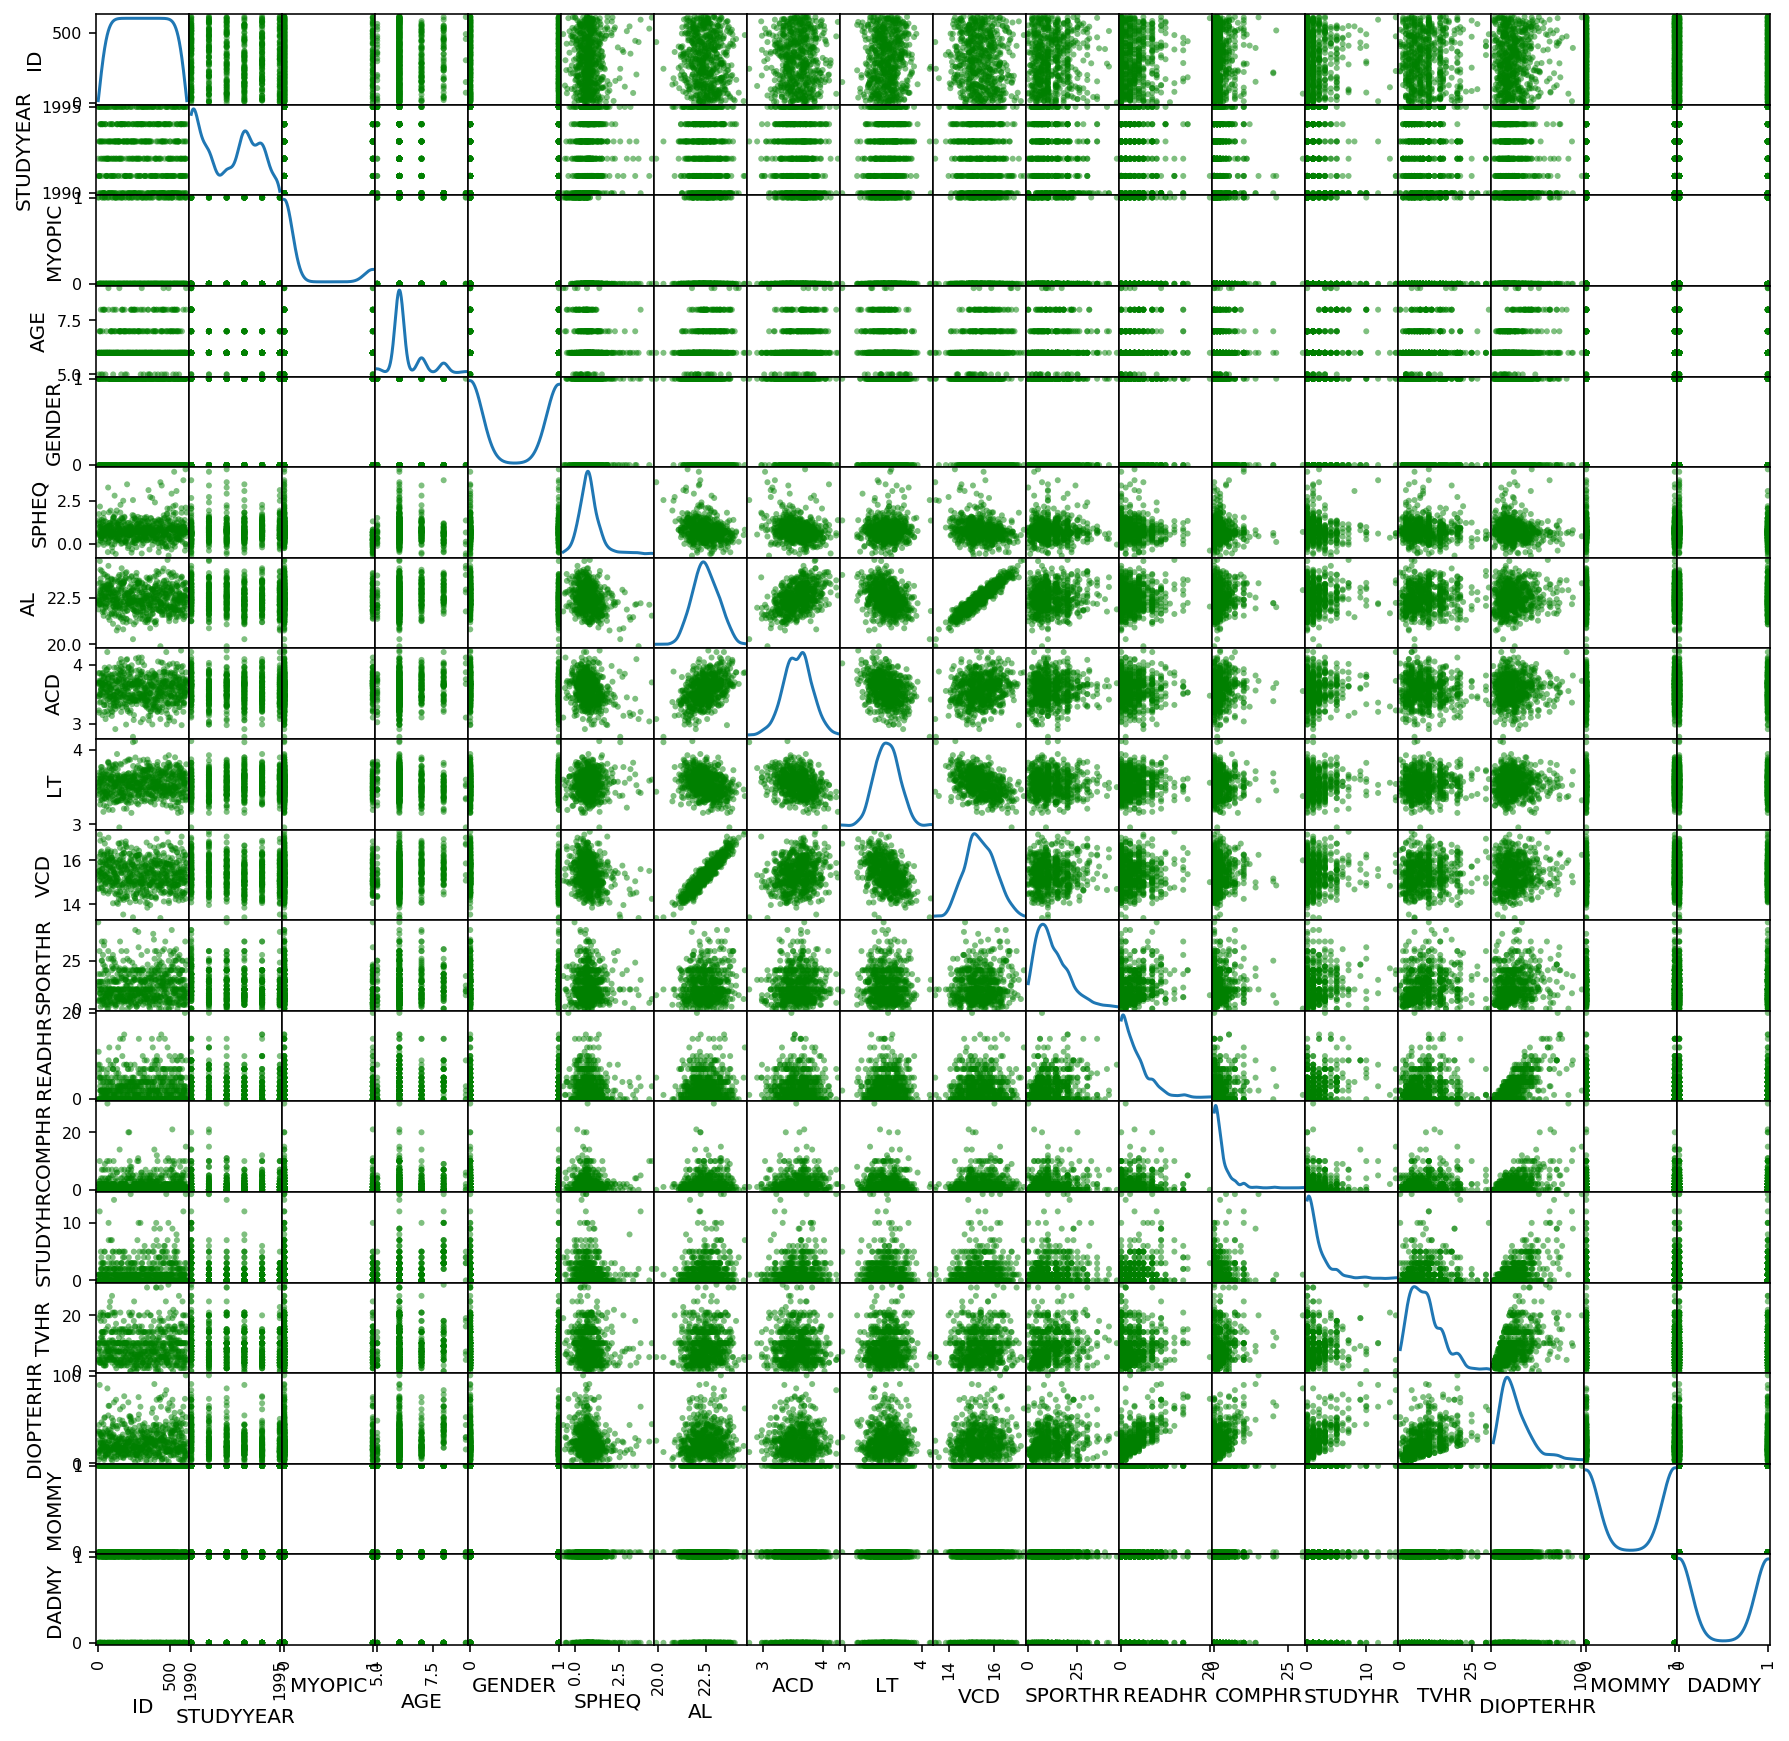

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(myopia, figsize = (15, 15), diagonal = 'kde', color='g');

There are several features where there is a clear correlation, for example VCD-AL.

## Feature selection
Starting you can get a list with independent characteristics and another list with the target feature.

In [13]:
target = 'MYOPIC'
features = list(myopia.columns)
features.remove(target)
#Deleting variables that are identifiers
features.remove('ID')
#STUDYYEAR variable cannot be used in case of new actual predictions
features.remove('STUDYYEAR')

### Análisis de las características categóricas
There are four categorical features:
* AGE
* GENDER
* MOMMY
* DADMY

In [14]:
myopia.AGE.unique()

array([6, 5, 7, 8, 9], dtype=int64)

In [15]:
myopia.GENDER.unique()
myopia.DADMY.unique()

array([1, 0], dtype=int64)

Only the ´AGE´ have several levels, the rest are binary, and therefore it is not necessary to create a feature set of type *dummy*, only we create a type dummy in AGE variable.

In [16]:
pd.get_dummies(myopia['AGE'], prefix = 'AGE').head(3)

,AGE_5,AGE_6,AGE_7,AGE_8,AGE_9
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0


In [17]:
dummie = pd.get_dummies(myopia['AGE'], prefix = 'AGE')
names = list(dummie.columns)
names.remove(names[0])
features.remove('AGE')
myopia_dummy = pd.concat([myopia[features], dummie[names]], axis = 1)

myopia_dummy.describe()

,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,AGE_6,AGE_7,AGE_8,AGE_9
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,0.488673,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.737864,0.132686,0.085761,0.009709
std,0.500277,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.440152,0.339510,0.280237,0.098133
min,0.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Elimination of collinear features
We can use VIF (Variance inflation factor) method.

In [18]:
from sklearn.linear_model import LinearRegression

def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        if model.score(data[x_features], data[y_featue]) == 1:
            result[y_featue] = Infinity
        else:
            result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

def selectDataUsingVIF(data, max_VIF = 5):
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.as_matrix().max() > max_VIF:
        col_max = np.where(VIF == VIF.as_matrix().max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

In [19]:
calculateVIF(myopia_dummy)

,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,AGE_6,AGE_7,AGE_8,AGE_9
VIF,1.307391,1.233264,30990.423688,3553.695725,1601.827052,29593.71668,1.088203,inf,inf,inf,inf,inf,1.066731,1.035865,6.273963,4.466573,3.761098,1.336298


It can be seen that there is a large multicollinearity between the different characteristics of the model. In fact, there are several features with Infinite VIF, indicating perfect multicollinearity. You can use the algorithm to select only those that have a VIF less than 5.

In [20]:
vif_selection = selectDataUsingVIF(myopia_dummy, 5)
calculateVIF(vif_selection)

C:\Users\JoseLuisFernandez\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\JoseLuisFernandez\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


,GENDER,SPHEQ,ACD,LT,VCD,SPORTHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,AGE_7,AGE_8,AGE_9
VIF,1.300187,1.211911,1.308197,1.435744,1.490542,1.087364,1.656589,2.352737,1.456505,3.37737,1.047097,1.035732,1.0802,1.413435,1.051193


It is noted that only 15 characteristics of the 18 initials remain.

### Selection of the best candidates
`SelectKBest` method can be used to select the best candidates. In this case, when working with a classification problem, the indicated `f_classif` must be used. In the next step you can select the 8 best.

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

var_sk = SelectKBest(f_classif, k = 8)
var_sk.fit_transform(vif_selection, myopia[target])

k_selection = vif_selection.loc[:, var_sk.get_support()]

You can now see the remaining features for model creation.

In [22]:
k_selection.head()

,GENDER,SPHEQ,ACD,LT,SPORTHR,MOMMY,DADMY,AGE_9
0,1,-0.052,3.690,3.498,45,1,1,0
1,1,0.608,3.702,3.392,4,1,1,0
2,1,1.179,3.462,3.514,14,0,0,0
3,1,0.525,3.862,3.612,18,0,1,0
4,0,0.697,3.676,3.454,14,1,0,0


## Creating a training and validation dataset
Before starting model creation, it is necessary to separate the sample into one for training and one for validation.

In [23]:
from sklearn.model_selection import train_test_split

features = list(k_selection.columns)

x_train, x_test, y_train, y_test = train_test_split(k_selection, myopia[target],  random_state = 0)

## Metric Function

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

def metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    print(u'Confusion Matrix \n', cm)

    print(u'Accurancy:', accuracy_score(y_true, y_pred))
    print(u'Precision:', precision_score(y_true, y_pred))
    print(u'Recall:', recall_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print(u'AUC:', auc(false_positive_rate, recall))

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title(u'AUC = %0.2f' % roc_auc)

## Creating model
Para la creación del modelo se pueden utilizar las diferentes técnicas estudiadas: regresión logística, árboles de decisión, maquinas vector soporte y vecinos más cercanos. El primer modelo se realiza con la regresión logística.
* Logistic regression
* Decision trees
* Random Forest
* SVM (Support Vector Machines)
* Knn (k-Nearest Neighbor)

### Logistic Regression

Confusion Matrix 
 [[397   7]
 [ 39  20]]
Accurancy: 0.9006479481641468
Precision: 0.7407407407407407
Recall: 0.3389830508474576
AUC: 0.6608281590870951


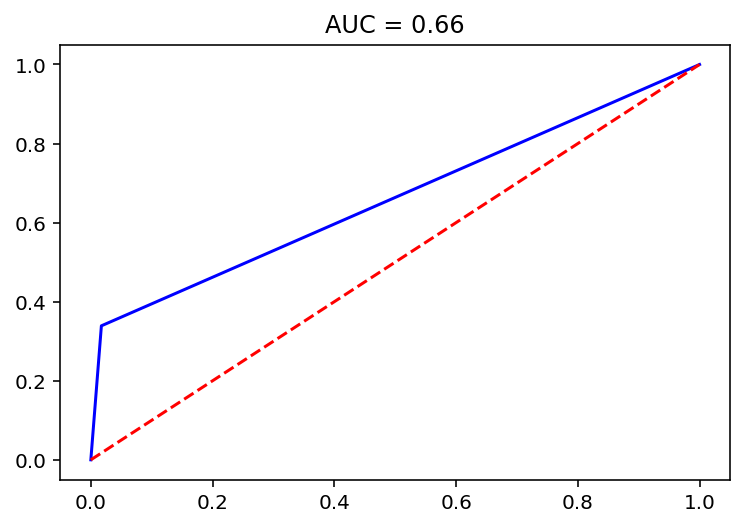

In [25]:
from sklearn.linear_model.logistic import LogisticRegression

model = LogisticRegression().fit(x_train, y_train)
y_pred_train = model.predict(x_train)

metrics(y_train, y_pred_train)

The accuracy of the model is high, but not the completeness or the area under the curve.

You can now see how the model works in the test dataset.

Confusion Matrix 
 [[130   3]
 [ 16   6]]
Accurancy: 0.8774193548387097
Precision: 0.6666666666666666
Recall: 0.2727272727272727
AUC: 0.6250854408749146


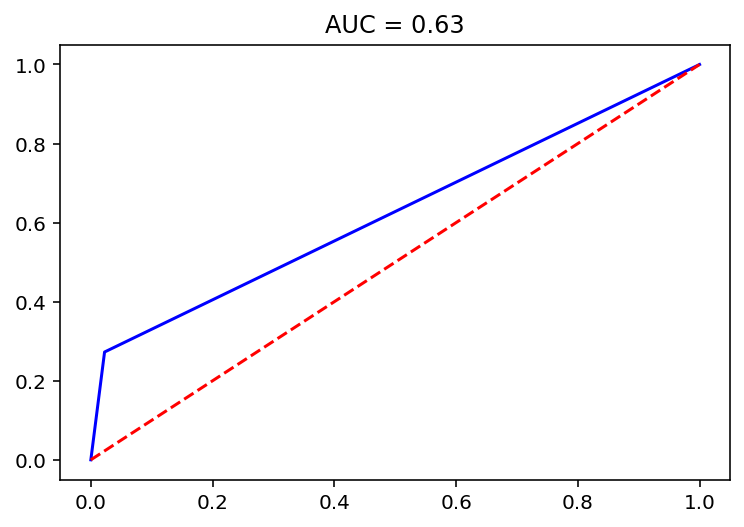

In [26]:
y_pred_test = model.predict(x_test)
metrics(y_test, y_pred_test)

You can check that the model shows some overfitting.

### Decision trees  
we use a maximum depth of 6 and entropy.

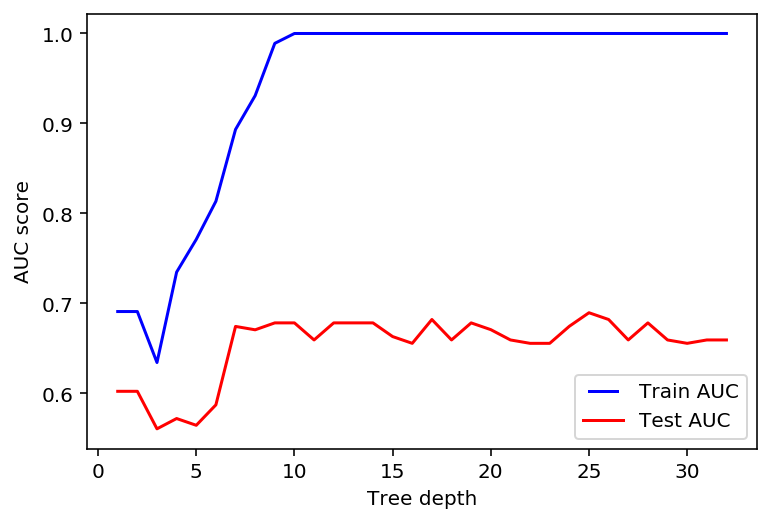

In [38]:
from sklearn.tree import DecisionTreeClassifier
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train AUC')
line2, = plt.plot(max_depths, test_results, "r", label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

The optimal depth is around 8 but there is a high overfitting. To decrease the overfitting we would have to go to a depth of 2 but we show performance results similar to the line regression.

Confusion Matrix 
 [[400   4]
 [ 41  18]]
Accurancy: 0.9028077753779697
Precision: 0.8181818181818182
Recall: 0.3050847457627119
AUC: 0.647591877831851


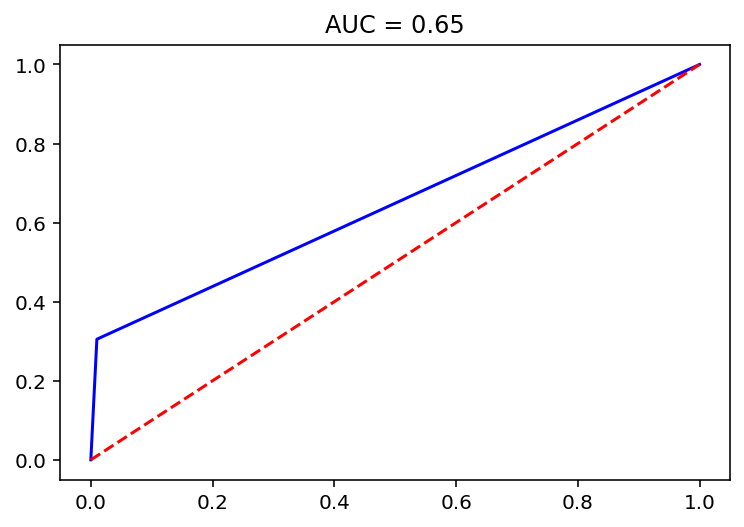

In [49]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = 2,
                              random_state = 0)
tree.fit(x_train, y_train)
y_pred_train = tree.predict(x_train)

metrics(y_train, y_pred_train)

The model is better than that obtained by linear regression. You must verify that the model does not overfit in the test data.

Confusion Matrix 
 [[132   1]
 [ 17   5]]
Accurancy: 0.8838709677419355
Precision: 0.8333333333333334
Recall: 0.22727272727272727
AUC: 0.609876965140123


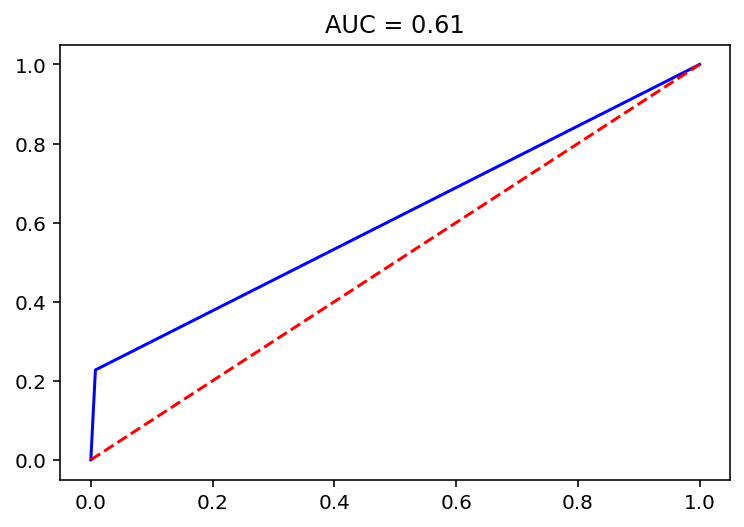

In [50]:
y_pred_test = tree.predict(x_test)
metrics(y_test, y_pred_test)

### Random Forest  
We can repeat the process with the classifier `RandomForestClassifier`. Initially it can be tested with a depth of 6 levels.

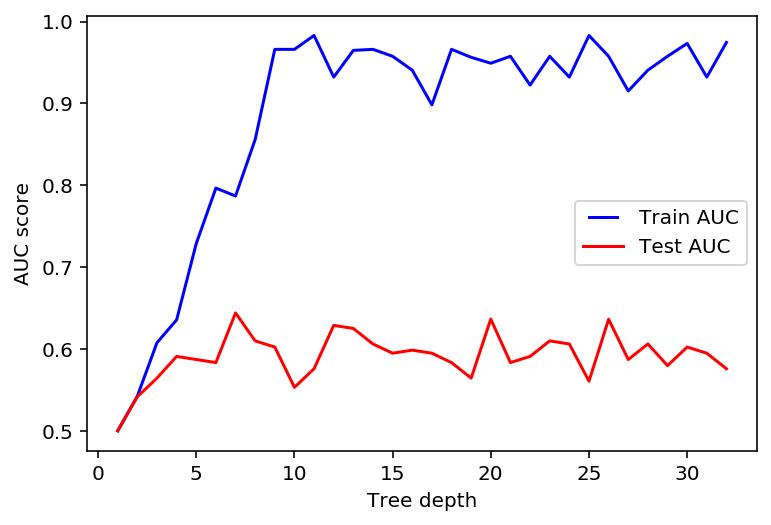

In [51]:
from sklearn.ensemble import RandomForestClassifier

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train AUC')
line2, = plt.plot(max_depths, test_results, "r", label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

For less overfitting and better performance, we need to set a depth around 4, but the model doesn't find better performance than the previous ones.

Confusion Matrix 
 [[401   3]
 [ 32  27]]
Accurancy: 0.9244060475161987
Precision: 0.9
Recall: 0.4576271186440678
AUC: 0.7251006880349052


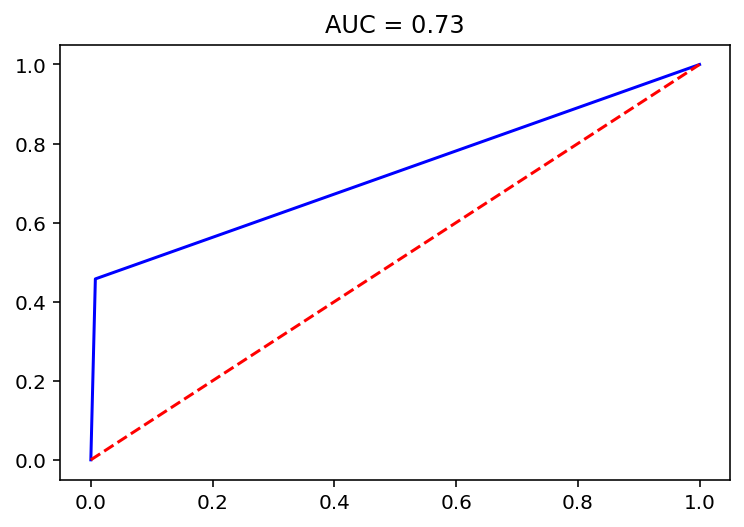

In [78]:
rf_classifier = RandomForestClassifier(n_estimators = 5, max_depth=4,
                                       random_state = 1)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_train)

metrics(y_train, y_pred)

Confusion Matrix 
 [[130   3]
 [ 16   6]]
Accurancy: 0.8774193548387097
Precision: 0.6666666666666666
Recall: 0.2727272727272727
AUC: 0.6250854408749146


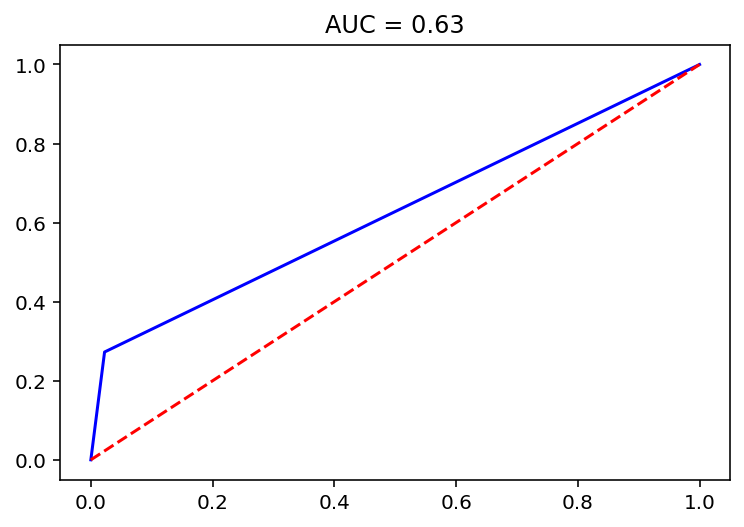

In [79]:
y_test_pred = rf_classifier.predict(x_test)
metrics(y_test, y_test_pred)

### SVM (Support Vector Machines)

Confusion Matrix 
 [[397   7]
 [ 42  17]]
Accurancy: 0.8941684665226782
Precision: 0.7083333333333334
Recall: 0.288135593220339
AUC: 0.6354044302735359


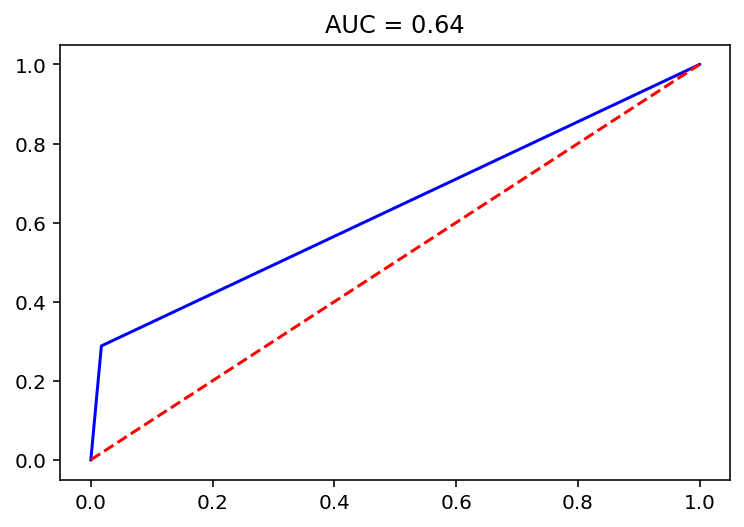

In [53]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear').fit(x_train, y_train)

clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)

metrics(y_train, y_pred_train)

Confusion Matrix 
 [[130   3]
 [ 17   5]]
Accurancy: 0.8709677419354839
Precision: 0.625
Recall: 0.22727272727272727
AUC: 0.6023581681476419


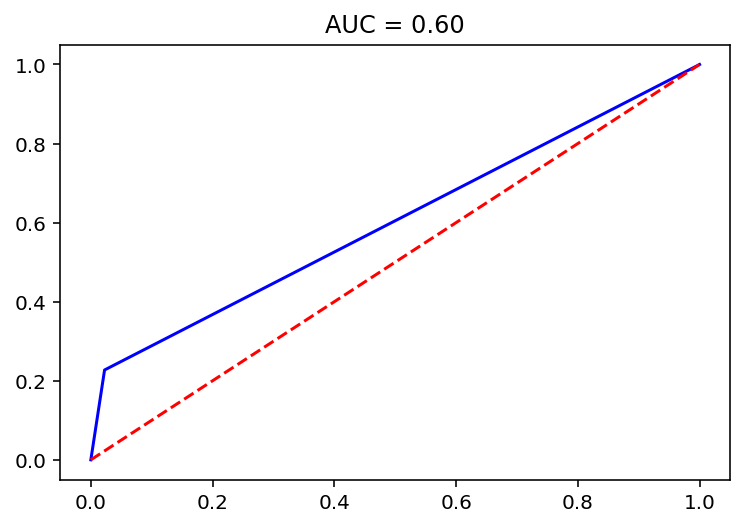

In [54]:
y_pred_test = clf.predict(x_test)
metrics(y_test, y_pred_test)

The overfitting has been reduced, but the model is no better than the previous one.

### Knn (k-Nearest Neighbor)

Initially you can use a value of 3 neighbors and we test to see which results it gives us the best result and less overfitting.

Confusion Matrix 
 [[401   3]
 [ 43  16]]
Accurancy: 0.9006479481641468
Precision: 0.8421052631578947
Recall: 0.2711864406779661
AUC: 0.6318803490518543


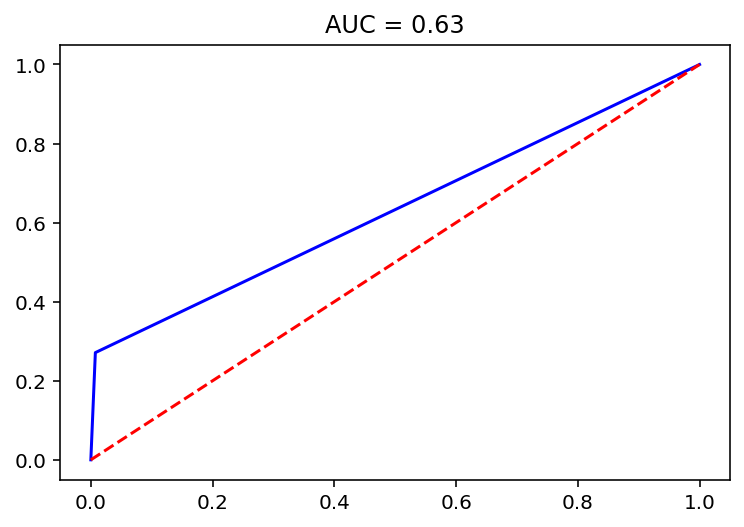

In [68]:
from sklearn.neighbors import KNeighborsClassifier
# First we use a value of 3 neighbors.
knn = KNeighborsClassifier(n_neighbors = 4)

knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)

metrics(y_train, y_pred_train)

Confusion Matrix 
 [[132   1]
 [ 18   4]]
Accurancy: 0.8774193548387097
Precision: 0.8
Recall: 0.18181818181818182
AUC: 0.5871496924128503


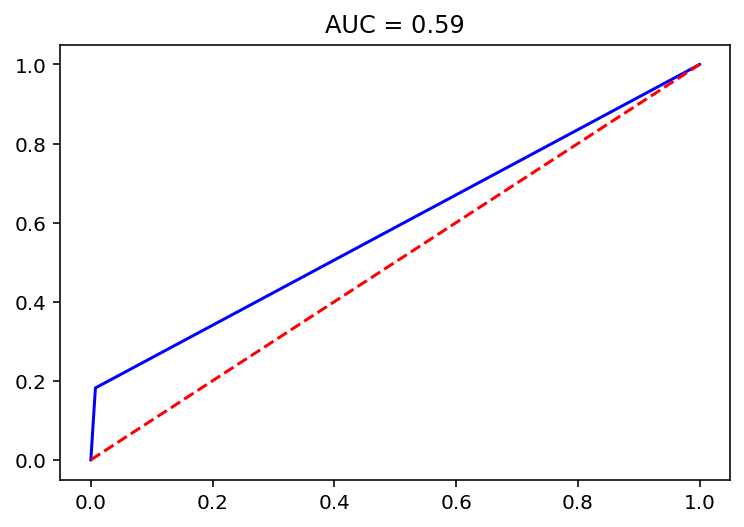

In [69]:
y_pred_test = knn.predict(x_test)
metrics(y_test, y_pred_test)

We don't get better results than the previous methods

**Summary:**  
1. RL = .66/.63
2. Dt = .65/.61
3. SVM = .64/.60
4. Knn = .63/.59
5. RF = .73/.63